# Classification Model

## Loading packages and data
The dataset is the previously modified version of chef (delivered for the regression assignment).

__important__ : Max Depth can only be <= 8

In [1]:
# importing python's 101
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing python's 102
# CART model packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# other packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# loading data
file = './datasets/chef_dataset_7.xlsx'
chef = pd.read_excel(io = file)

# checking if it worked
chef.head(n=5)


revenue  cross_sell_success               name                     email  \
0    393.0                   1            Saathos  saathos@unitedhealth.com   
1   1365.0                   1    Alysanne Osgrey    alysanne.osgrey@ge.org   
2    800.0                   1     Edwyd Fossoway    edwyd.fossoway@jnj.com   
3    600.0                   1  Eleyna Westerling  eleyna.westerling@ge.org   
4   1490.0                   1      Elyn Norridge     elyn.norridge@jnj.com   

  first_name family_name  total_meals_ordered  unique_meals_purch  \
0    Saathos     Saathos                   14                   6   
1   Alysanne      Osgrey                   87                   3   
2      Edwyd    Fossoway                   15                   7   
3     Eleyna  Westerling                   13                   6   
4       Elyn    Norridge                   47                   8   

   contacts_w_customer_service  product_categories_viewed  ...  \
0                           12                         10  ...   
1                            8                          8  ...   
2                           11                          5  ...   
3                           11                          5  ...   
4                            6                         10  ...   

   log_unique_meals_purch  log_contacts_w_customer_service  \
0                0.778151                         1.079181   
1                0.477121                         0.903090   
2                0.845098                         1.041393   
3                0.778151                         1.041393   
4                0.903090                         0.778151   

   log_avg_time_per_site_visit  log_avg_prep_vid_time  log_median_meal_rating  \
0                     1.681241               1.523746                0.000000   
1                     1.605844               1.928396                0.477121   
2                     1.296007               1.799341                0.301030   
3                     1.954243               1.641474                0.301030   
4                     1.606166               1.928396                0.477121   

   log_avg_clicks_per_visit  log_avg_order_size  total_logins  avg_total_time  \
0                  1.230449                 0.0             7           81.40   
1                  1.113943                 0.0             6          125.15   
2                  1.204120                 0.0             7           82.77   
3                  1.146128                 0.0             7          133.80   
4                  1.079181                 0.0             6          125.18   

   log_avg_total_time  
0            1.910624  
1            2.097431  
2            1.917873  
3            2.126456  
4            2.097535  

[5 rows x 55 columns]

## Loading Previous UDF
A UDF made by professor Chase to display trees

In [2]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

## Explanatory and Response Data

In [3]:

# creating logs of variables (full)
full_log_chef_data = chef.drop(['cross_sell_success' , 'name', 'email',
                       'first_name','family_name', 'total_meals_ordered',
                      'unique_meals_purch', 'contacts_w_customer_service',
                      'avg_time_per_site_visit', 'avg_prep_vid_time',
                      'median_meal_rating', 'avg_clicks_per_visit',
                      'avg_order_size'] , axis = 1)

# creating target data
chef_target = chef.loc[: , 'cross_sell_success']

In [4]:
# train test classifier with all of the data
x_train , x_test , y_train , y_test = train_test_split(full_log_chef_data,
                                                       chef_target,
                                                       test_size = 0.25,
                                                       random_state = 219,
                                                       stratify = chef_target)

## Full Tree Classifier

In [5]:
# INSTANTIATING a classification tree
full_tree = DecisionTreeClassifier()

# FITTING the training data
full_tree_fit = full_tree.fit(x_train , y_train)

# PREDICTING on the new data
full_tree_pred = full_tree_fit.predict(x_test)

# SCORING the current model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.6016
Full Tree AUC Score: 0.546


In [6]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing the matrix
print(f"""
True Negatives : {full_tree_tn} || False Positives : {full_tree_fp}
{'-'*43}
False Negatives: {full_tree_fn} || True Positives : {full_tree_tp}

""")


True Negatives : 61 || False Positives : 95
-------------------------------------------
False Negatives: 99 || True Positives : 232




In [7]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = x_train)

## Pruning the Tree

In [8]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 3,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7306
Testing  ACCURACY: 0.7331
AUC Score        : 0.6155


In [9]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing the matrix
print(f"""
True Negatives : {pruned_tree_tn} || False Positives : {pruned_tree_fp}
{'-'*43}
False Negatives: {pruned_tree_fn} || True Positives : {pruned_tree_tp}
""")


True Negatives : 45 || False Positives : 111
-------------------------------------------
False Negatives: 19 || True Positives : 312



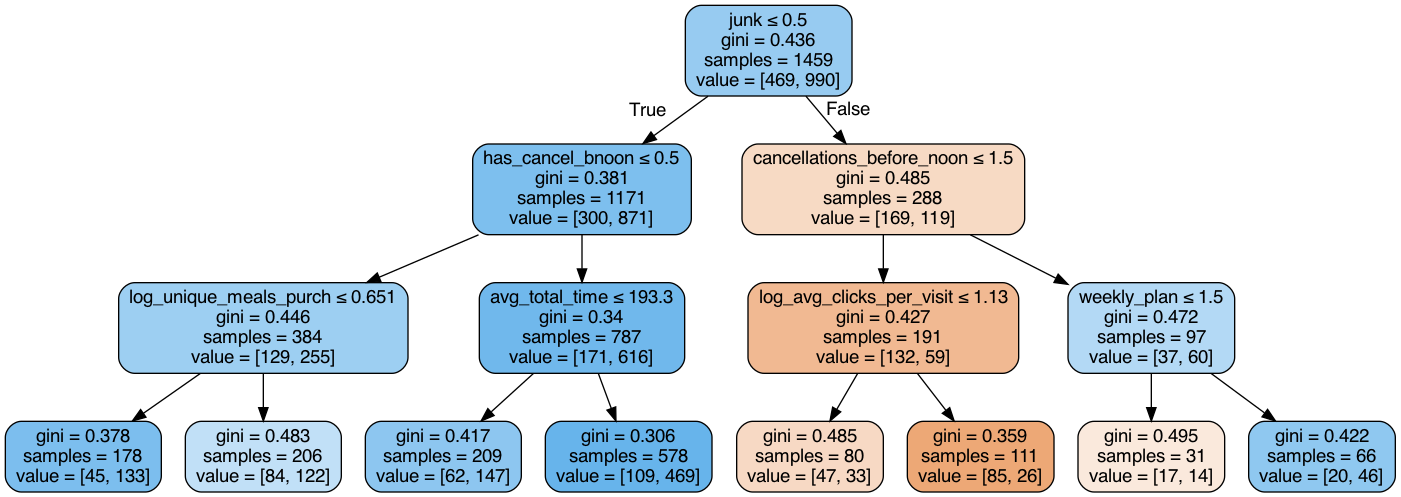

In [10]:
# displaying the tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<ipython-input-2-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


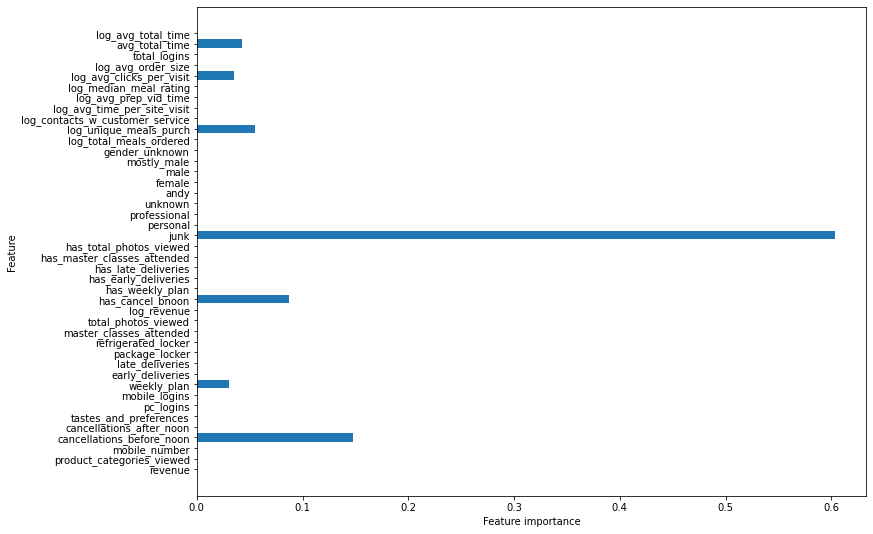

In [11]:
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

In [12]:
# Creating significant data based on the previous tree
significant_chef_data = chef.loc[: ,[ 'log_avg_clicks_per_visit' ,
                              'log_unique_meals_purch',
                              'junk', 'weekly_plan',
                              'cancellations_before_noon',
                              'mobile_number'] ]

## Pruned Tree v2.0 
A pruned tree with __significant_chef_data__

In [13]:
# creating a new train_test_split with significant_chef_data.
x_train_sig , x_test_sig, y_train_sig, y_test_sig = train_test_split(significant_chef_data,
                                                     chef_target,
                                                     test_size = 0.25,
                                                     random_state = 219,
                                                     stratify = chef_target)

In [14]:
# INSTANTIATING a classification tree object
pruned_tree_sig = DecisionTreeClassifier(max_depth = 1,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit_sig  = pruned_tree.fit(x_train_sig, y_train_sig)


# PREDICTING on new data
pruned_tree_pred_sig = pruned_tree_fit.predict(x_test_sig)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit_sig.score(x_train_sig, y_train_sig).round(4))
print('Testing  ACCURACY:', pruned_tree_fit_sig.score(x_test_sig, y_test_sig).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_sig,
                                          y_score = pruned_tree_pred_sig).round(4))


# saving scoring data for future use
pruned_tree_train_score_sig = pruned_tree_fit_sig.score(x_train_sig, y_train_sig).round(4) # accuracy
pruned_tree_test_score_sig  = pruned_tree_fit_sig.score(x_test_sig, y_test_sig).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score_sig   = roc_auc_score(y_true  = y_test_sig,
                                        y_score = pruned_tree_pred_sig).round(4) # auc

Training ACCURACY: 0.7306
Testing  ACCURACY: 0.7331
AUC Score        : 0.6155


In [15]:
# unpacking the confusion matrix
sig_pruned_tree_tn, \
sig_pruned_tree_fp, \
sig_pruned_tree_fn, \
sig_pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred_sig).ravel()


# printing the matrix
print(f"""
True Negatives : {sig_pruned_tree_tn} || False Positives : {sig_pruned_tree_fp}
{'-'*43}
False Negatives: {sig_pruned_tree_fn} || True Positives : {sig_pruned_tree_tp}
""")


True Negatives : 45 || False Positives : 111
-------------------------------------------
False Negatives: 19 || True Positives : 312



### Pruning the tree for better results
__What the model gave us__
- DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=5,
                       min_samples_leaf=8, random_state=219)

## Random Forest Classifier

In [16]:
# Importing Some Packages
from sklearn.ensemble import RandomForestClassifier     # random forest

In [17]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     =  100,
                                    criterion        = 'gini',
                                    max_depth        =  None,
                                    min_samples_leaf =  1,
                                    bootstrap        =  True,
                                    warm_start       =  False,
                                    random_state     =  219)

In [18]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.7125
AUC Score        : 0.597


<ipython-input-2-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


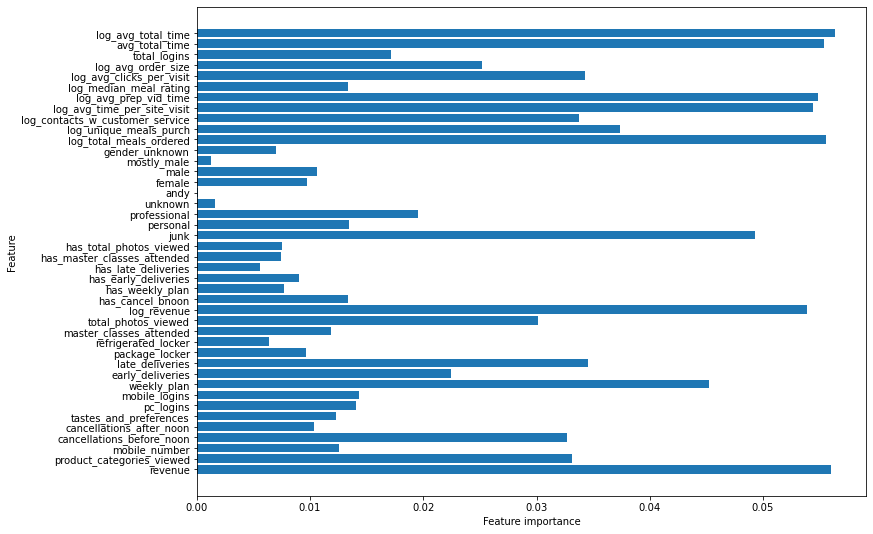

In [19]:
# feature importance
plot_feature_importances(rf_default_fit , x_train)

Interesting to note that JUNK is still one of the features with highest importance. Also now male and female are slightly important.

In [20]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn} || False Positives: {rf_fp}
{'-' * 43}
False Negatives: {rf_fn} || True Positives : {rf_tp}
""")


True Negatives : 43 || False Positives: 113
-------------------------------------------
False Negatives: 27 || True Positives : 304



### Result from hyperparameter tuning
RandomForestClassifier(bootstrap=False, random_state=219, warm_start=True)


In [21]:
# Prunning those Branches!!!
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(criterion = 'entropy', 
                                      min_samples_leaf = 26,
                                      max_depth = 7,
                                      n_estimators = 90, 
                                      random_state = 219, 
                                      warm_start = True,
                                      bootstrap = False)



# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train_sig, y_train_sig)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test_sig)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train_sig, y_train_sig).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test_sig, y_test_sig).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test_sig,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train_sig, y_train_sig).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test_sig, y_test_sig).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test_sig,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.73
Forest Tuned Testing  ACCURACY: 0.7331
Forest Tuned AUC Score        : 0.6104


In [22]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn} || False Positives: {tuned_rf_fp}
{'-'*43}
False Negatives: {tuned_rf_fn} || True Positives : {tuned_rf_tp}
""")


True Negatives : 42 || False Positives: 114
-------------------------------------------
False Negatives: 16 || True Positives : 315



## Pruned Decision Tree Re-Visited
Repeating the _Prunning_ process with a better understanding of the data, may lead to better variable selection and to new insightful feature engineering variables.

In [23]:
# Checking the available columns once again.
chef.columns



Index(['revenue', 'cross_sell_success', 'name', 'email', 'first_name',
       'family_name', 'total_meals_ordered', 'unique_meals_purch',
       'contacts_w_customer_service', 'product_categories_viewed',
       'avg_time_per_site_visit', 'mobile_number', 'cancellations_before_noon',
       'cancellations_after_noon', 'tastes_and_preferences', 'pc_logins',
       'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries',
       'package_locker', 'refrigerated_locker', 'avg_prep_vid_time',
       'avg_order_size', 'master_classes_attended', 'median_meal_rating',
       'avg_clicks_per_visit', 'total_photos_viewed', 'log_revenue',
       'has_cancel_bnoon', 'has_weekly_plan', 'has_early_deliveries',
       'has_late_deliveries', 'has_master_classes_attended',
       'has_total_photos_viewed', 'junk', 'personal', 'professional',
       'unknown', 'andy', 'female', 'male', 'mostly_male', 'gender_unknown',
       'log_total_meals_ordered', 'log_unique_meals_purch',
       'log_c

### New Features for quick use
Doubts about the __data__ may be found [here](https://drive.google.com/file/d/1u4fGrWjf-BKtxdPnWSi_y4nzG8tJXy5s/view?usp=sharing)



In [24]:
chef['price_per_meal'] = chef['revenue'] / chef['total_meals_ordered']
chef['total_cancellations'] = chef['cancellations_before_noon'] + chef['cancellations_after_noon']



chef['active_pc_user']  = 0  # pc users that spend more than the mean on the site and have low mobile logins
chef['common_user']     = 0  # Is part of the 75% of the app that pays. Some are under average, but them seem to be loyal
chef['checks_phone']    = 0  # people who check phone for deliveries

for index, value in chef.iterrows():
    
    if chef.loc[index , 'pc_logins'] > 5 and chef.loc[index ,'avg_time_per_site_visit'] >= 99.6 and \
    chef.loc[index, 'mobile_logins'] <= 1.4:
        chef.loc[index , 'active_pc_user'] = 1   
    
    if chef.loc[index, 'price_per_meal'] >= 25:
        chef.loc[index, 'common_user'] = 1
    
    if chef.loc[index, 'early_deliveries'] > 1 and  \
    chef.loc[index, 'avg_total_time'] >= 250.1:
        chef.loc[index, 'checks_phone'] = 1
        
    
    
 
    
    

In [25]:
chef['avg_total_time'].describe()

count    1946.000000
mean      250.161228
std        89.792811
min        77.260000
25%       193.420000
50%       239.260000
75%       291.945000
max      1824.200000
Name: avg_total_time, dtype: float64

In [26]:
# Checking if the value has more than 100 observations
chef['checks_phone'].value_counts()

0    1671
1     275
Name: checks_phone, dtype: int64

### Prune Testing

In [40]:
# repeating the process with only some x-values
x_variables = [
 'pc_logins', 'mobile_logins'
,'total_meals_ordered' 
,'contacts_w_customer_service' 
,'mobile_number'  
,'cancellations_before_noon' 
,'tastes_and_preferences' 
,'weekly_plan' 
,'avg_prep_vid_time' 
,'junk' 
,'professional' 
,'product_categories_viewed' 
    
    
# New features created to improve the model
,'common_user'
,'checks_phone'              
              
              
              ]

x_chef_data = chef[x_variables]

# train test split
x_train, x_test, y_train, y_test = train_test_split(x_chef_data,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 219,
                                                    stratify = chef_target)

In [41]:
# INSTANTIATING a classification model with tuned values
tree_tuned = DecisionTreeClassifier(criterion = 'gini', 
                                    max_depth = 8, 
                                    max_features = None,
                                    min_samples_leaf = 1 , 
                                    random_state = 219,
                                    splitter = 'best')

# fit not needed
tree_tuned_fit = tree_tuned.fit(x_chef_data , chef_target)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results

print('Training ACCURACY :', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY :', tree_tuned.score(x_test, y_test).round(4))

print('\nAUC Score         :', roc_auc_score(y_true  = y_test,
                                  y_score = tree_tuned_pred).round(4))

# saving scoring data for future use
tree_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy

print(f"\nDifference        : {(tree_train_score - tree_test_score).round(4)}")

# saving the AUC score
tree_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY : 0.8005
Testing  ACCURACY : 0.8501

AUC Score         : 0.8203

Difference        : -0.0496


In [29]:
.8203

0.8203

<ipython-input-2-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


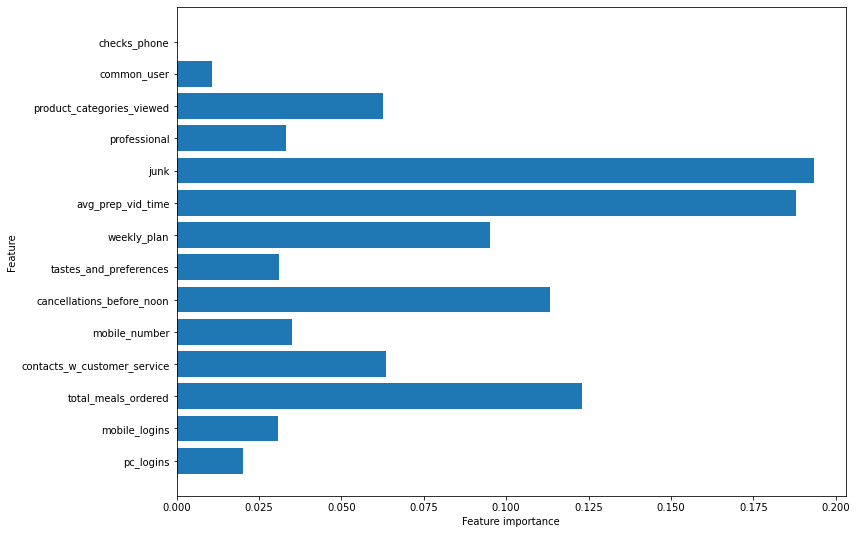

In [30]:
plot_feature_importances(tree_tuned_fit,
                         train  = x_train,
                         export = False)

In [31]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""\n\033[1m \t      Confusion Matrix \033[0m\n
True Negatives : {tuned_tree_tn} || False Positives: {tuned_tree_fp}
{'-'*43}
False Negatives: {tuned_tree_fn}  || True Positives : {tuned_tree_tp}
""")


 	      Confusion Matrix 

True Negatives : 115 || False Positives: 41
-------------------------------------------
False Negatives: 32  || True Positives : 299



Text(0.5, 1.0, 'Co-Linearity of X-Variables')

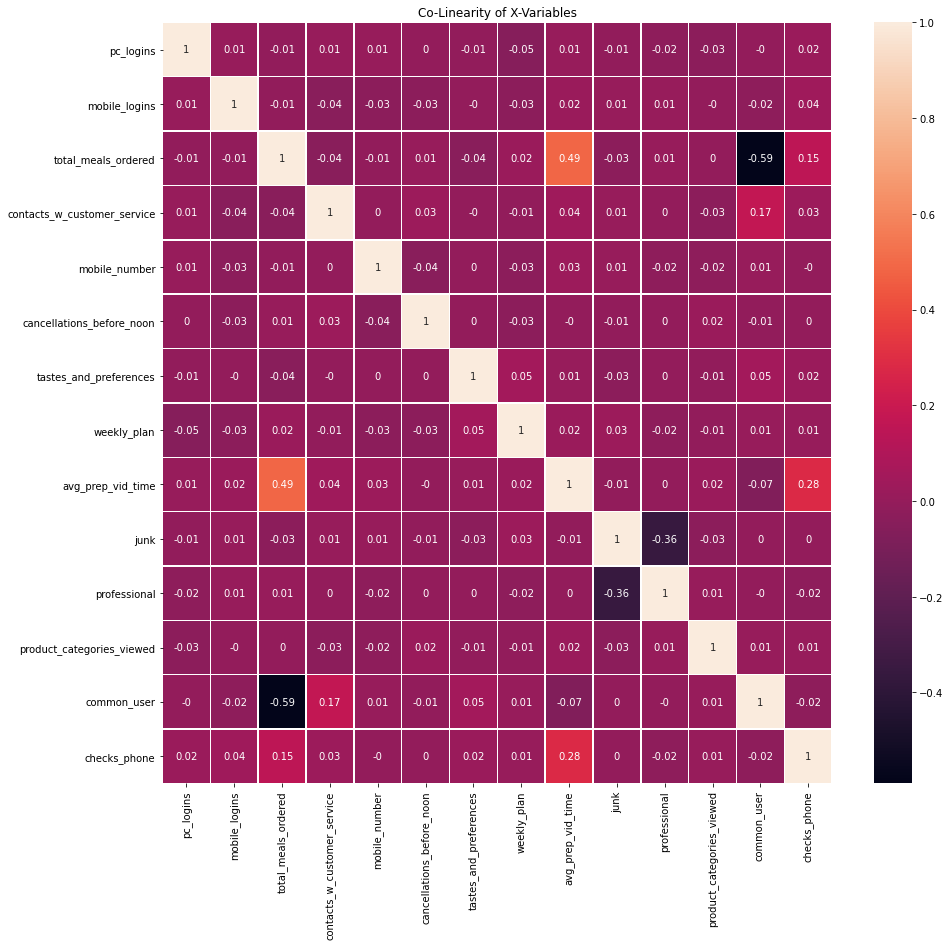

In [32]:
# Checking for Colinearity
# removing variables with a .6 or higher

cor = chef.loc[: , x_variables].corr().round(2)

plt.figure(figsize = (15,14))
sns.heatmap(cor, annot = True, linewidths = 0.5).set_title("Co-Linearity of X-Variables")

In [33]:
# saving the file
chef.to_excel('./datasets/chef_dataset_final.xlsx', index = False)

## Printing the Final Model Results

In [34]:
# Printing and scoring the results
print('Model Name: \033[1m \t      Classification Tree \033[0m\n')
print('Training ACCURACY :\t', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY :\t', tree_tuned.score(x_test, y_test).round(4))

print('\nAUC Score         :\t', roc_auc_score(y_true  = y_test,
                                  y_score = tree_tuned_pred).round(4))

# saving scoring data for future use
tree_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy

print(f"\nDifference        :\t{(tree_train_score - tree_test_score).round(4)}")

# saving the AUC score
tree_auc         = roc_auc_score(y_true  = y_test,
                                  y_score = tree_tuned_pred).round(4) # auc
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred)\
.ravel()


# printing each result one-by-one
print(f"""\n\n\033[1m \t      Confusion Matrix \033[0m\n
True Negatives : {tuned_tree_tn} || False Positives: {tuned_tree_fp}
{'-'*43}
False Negatives: {tuned_tree_fn}  || True Positives : {tuned_tree_tp}
""")

Model Name:  	      Classification Tree 

Training ACCURACY :	 0.8005
Testing  ACCURACY :	 0.8501

AUC Score         :	 0.8203

Difference        :	-0.0496


 	      Confusion Matrix 

True Negatives : 115 || False Positives: 41
-------------------------------------------
False Negatives: 32  || True Positives : 299

